In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

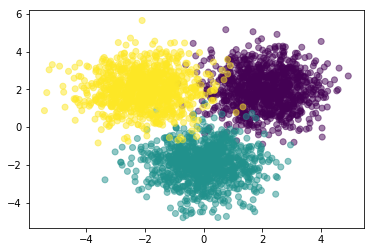

In [3]:
D = 2
K = 3
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)

In [5]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z = np.tanh(np.matmul(X,W1) + b1)
    P_hat = softmax(np.matmul(Z,W2) + b2)
    return Z, P_hat

def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, P_hat):
    return np.mean(y == P_hat.argmax(axis = 1))

In [21]:
M = 4

W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [22]:
Z, P_hat = feed_forward(X, W1, b1, W2, b2)

In [23]:
print("Accuracy: {:0.4f}".format(accuracy(y, P_hat)))

Accuracy: 0.4597
